# House Prediction

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as seb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
train_data=pd.read_csv('dataset3.csv')

In [5]:
train_data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,7129300520,20141013,3,1,1180,5650,1,no,0,3,7,1180,0,1955,1995.0,98178,47.5112,-1227.000,221900
1,6414100192,20141209,3,2,2570,7242,2,no,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,538000
2,5631500400,20150225,2,1,770,10000,1,no,0,3,6,770,0,1933,1995.0,98028,47.7379,-122.233,180000
3,2487200875,20141209,4,3,1960,5000,1,no,0,5,7,1050,910,1965,1995.0,98136,47.5208,-122.393,604000
4,1954400510,20150218,3,2,1680,8080,1,no,0,3,8,1680,0,1987,1995.0,98074,47.6168,-122.045,510000


In [6]:
train_data.shape

(16914, 19)

In [7]:
train_data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


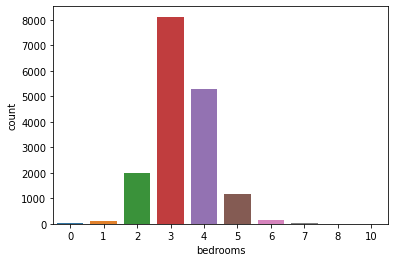

In [8]:
seb.countplot(train_data['bedrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


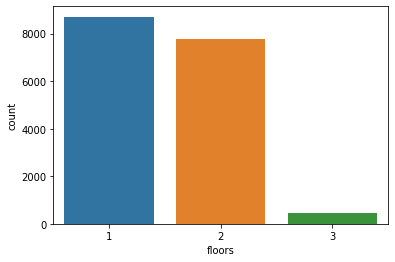

In [9]:
seb.countplot(train_data['floors'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


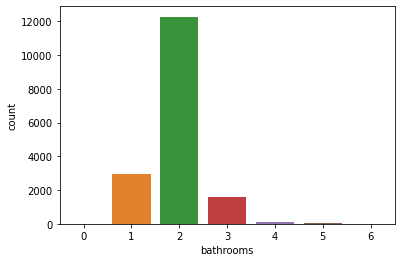

In [10]:
seb.countplot(train_data['bathrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


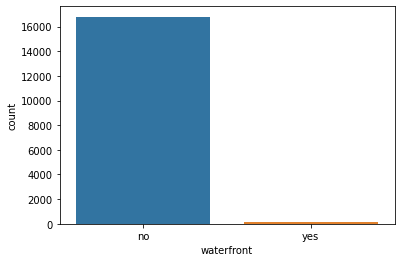

In [11]:
seb.countplot(train_data['waterfront'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


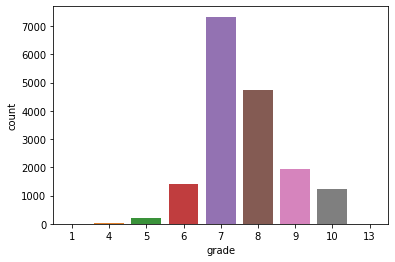

In [12]:
seb.countplot(train_data['grade'])

In [13]:
label_enc= LabelEncoder ()

data_enc = train_data

data_enc.waterfront= label_enc.fit_transform(train_data.waterfront) 
data_enc.head (10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,7129300520,20141013,3,1,1180,5650,1,0,0,3,7,1180,0,1955,1995.0,98178,47.5112,-1227.000,221900
1,6414100192,20141209,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,538000
2,5631500400,20150225,2,1,770,10000,1,0,0,3,6,770,0,1933,1995.0,98028,47.7379,-122.233,180000
3,2487200875,20141209,4,3,1960,5000,1,0,0,5,7,1050,910,1965,1995.0,98136,47.5208,-122.393,604000
4,1954400510,20150218,3,2,1680,8080,1,0,0,3,8,1680,0,1987,1995.0,98074,47.6168,-122.045,510000
5,7237550310,20140512,4,2,5420,101930,1,0,0,3,10,3890,1530,2001,1995.0,98053,47.6561,-122.005,1225000
6,1321400060,20140627,3,2,1715,6819,2,0,0,3,7,1715,0,1995,1995.0,98003,47.3097,-122.327,257500
7,2008000270,20150115,3,2,1060,9711,1,0,0,3,7,1060,0,1963,1995.0,98198,47.4095,-122.315,291850
8,2414600126,20150415,3,1,1780,7470,1,0,0,3,7,1050,730,1960,1995.0,98146,47.5123,-122.337,229500
9,3793500160,20150312,3,2,1890,6560,2,0,0,3,7,1890,0,2003,1995.0,98038,47.3684,-122.031,323000


In [14]:
train_data.corr()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
id,1.000000,-0.010762,-0.011548,-0.016311,-0.004928,-0.137410,0.014862,-0.042106,-0.001824,-0.061638,0.019061,-0.004273,-0.002152,0.047656,0.016310,-0.051605,0.002791,0.034272,-0.009977
date,-0.010762,1.000000,-0.028534,-0.048033,-0.036402,-0.015133,-0.031784,0.012839,-0.026443,-0.006256,-0.033873,-0.028499,-0.021415,-0.016914,-0.007876,0.031447,-0.013912,0.013217,-0.000339
bedrooms,-0.011548,-0.028534,1.000000,0.411505,0.571282,0.073981,0.169489,-0.049278,0.048496,0.060039,0.369390,0.474588,0.286797,0.134049,-0.004393,-0.184012,-0.021883,-0.006409,0.303599
bathrooms,-0.016311,-0.048033,0.411505,1.000000,0.601395,0.146873,0.301025,0.078414,0.177024,-0.035326,0.528014,0.510290,0.282650,0.397705,0.021363,-0.192022,0.033754,0.016391,0.425656
sqft_living,-0.004928,-0.036402,0.571282,0.601395,1.000000,0.214275,0.300259,0.079774,0.287092,-0.012205,0.749524,0.866689,0.437214,0.306083,0.007393,-0.226821,0.094235,0.022583,0.699724
sqft_lot,-0.137410,-0.015133,0.073981,0.146873,0.214275,1.000000,-0.025371,0.032709,0.044916,-0.018077,0.115099,0.230302,0.013289,0.088226,-0.003742,-0.139370,-0.023058,0.013008,0.126084
floors,0.014862,-0.031784,0.169489,0.301025,0.300259,-0.025371,1.000000,-0.008230,-0.016383,-0.206813,0.392831,0.487184,-0.277887,0.357227,0.009842,-0.020367,0.088723,0.010945,0.232936
waterfront,-0.042106,0.012839,-0.049278,0.078414,0.079774,0.032709,-0.008230,1.000000,0.374299,0.051704,0.052926,0.048172,0.072679,-0.021861,-0.000974,0.032525,-0.027314,0.009433,0.275155
view,-0.001824,-0.026443,0.048496,0.177024,0.287092,0.044916,-0.016383,0.374299,1.000000,0.076940,0.232820,0.141854,0.318367,-0.044622,-0.003092,0.068921,0.012368,-0.009300,0.428553
condition,-0.061638,-0.006256,0.060039,-0.035326,-0.012205,-0.018077,-0.206813,0.051704,0.076940,1.000000,-0.085566,-0.106407,0.167431,-0.339413,-0.007694,0.034816,-0.050107,0.002231,0.059768


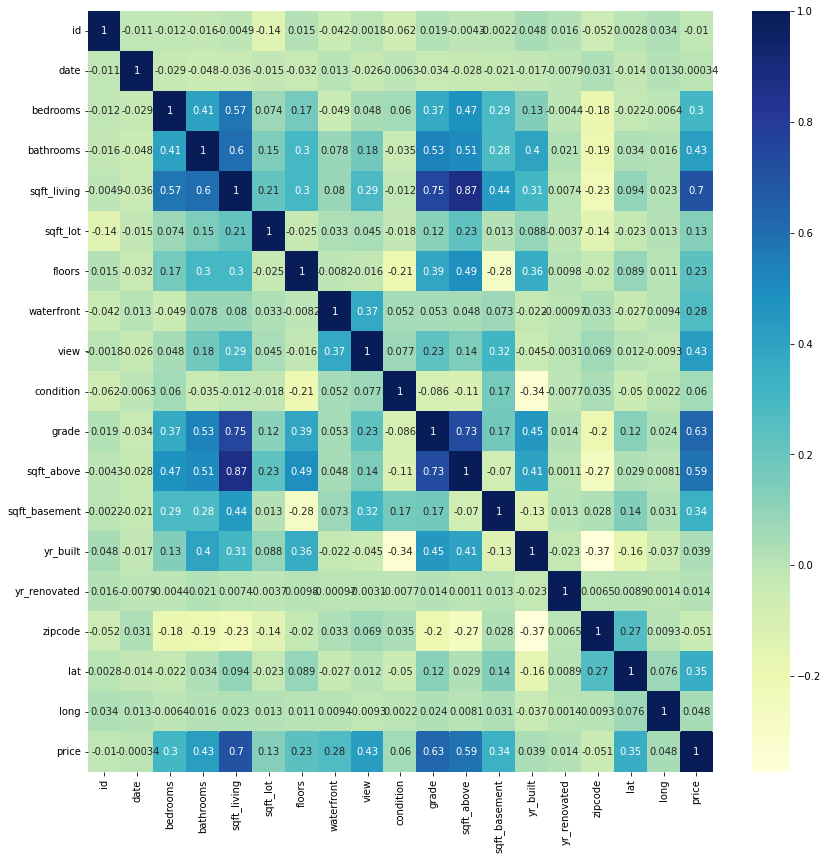

In [15]:
plt.figure(figsize=(14,14))
seb.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [16]:
X=train_data.drop(['price'],axis=1)
y=train_data.price

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12685, 18)
(4229, 18)
(12685,)
(4229,)


In [18]:
#1LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lm=LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lm.intercept_)
lm.coef_

-33767304.94019175


array([ 5.88233281e-07,  2.15754209e+00, -2.47506127e+04,  2.73099272e+04,
        1.14264864e+02, -2.37658193e-02,  2.05392556e+04,  7.20903847e+05,
        7.29703986e+04,  1.45794269e+04,  8.03617001e+04,  6.94519700e+01,
        4.48128937e+01, -2.45879731e+03, -1.75639354e-09, -3.48315771e+02,
        6.05246026e+05,  9.67777415e+00])

In [20]:
coefficients=pd.DataFrame([X_train.columns, lm.coef_]).T

coefficients

,0,1
0,id,5.88233e-07
1,date,2.15754
2,bedrooms,-24750.6
3,bathrooms,27309.9
4,sqft_living,114.265
5,sqft_lot,-0.0237658
6,floors,20539.3
7,waterfront,720904
8,view,72970.4
9,condition,14579.4


In [21]:
y_train_pred= lm.predict(X_train)
y_train_pred

array([402337.17967144, 139548.06142335, 597384.36056792, ...,
       470297.30789516, 539161.20752347, 553696.93050064])

In [23]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_train,y_train_pred))
print("Adjusted R^2:",1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))

R^2: 0.7052419493142296
Adjusted R^2: 0.7048230605638471


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


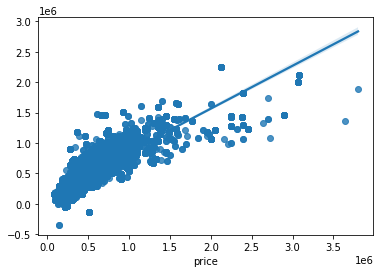

In [24]:
seb.regplot(y_train,y_train_pred)

Text(0, 0.5, 'model predicted purchase')

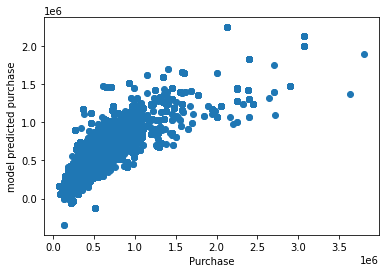

In [25]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Purchase')
plt.ylabel('model predicted purchase')

In [27]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([863080.11138503, 438150.51750585, 146233.2934192 , ...,
       759515.728116  , 153833.13146548, 446720.38254958])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


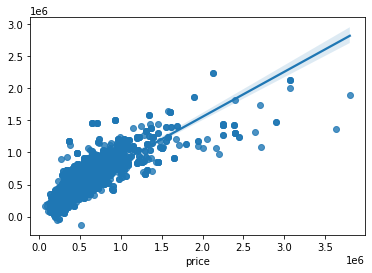

In [29]:
seb.regplot(y_test, y_test_pred)

Text(0, 0.5, 'Model Predicted Price')

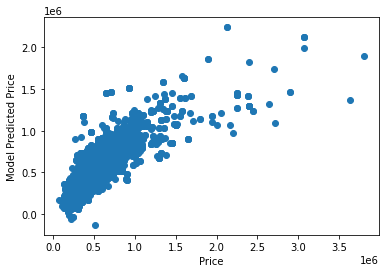

In [30]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Price')
plt.ylabel('Model Predicted Price')

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R^2:",r2_score(y_test,y_test_pred))
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.697224196346618
MAE: 112493.72529576615
MSE: 33013940726.36676
RMSE: 181697.38778080096


In [34]:
print("Linear Regression",lm.score(X_test,y_test))

Linear Regression 0.7052419493142296


In [38]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)


RandomForestRegressor()

In [39]:
y_train_pred= lm.predict(X_train)
y_train_pred

array([402337.17967144, 139548.06142335, 597384.36056792, ...,
       470297.30789516, 539161.20752347, 553696.93050064])

Text(0, 0.5, 'model predicted purchase')

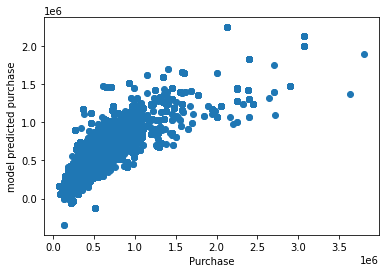

In [40]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Purchase')
plt.ylabel('model predicted purchase')

In [41]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([863080.11138503, 438150.51750585, 146233.2934192 , ...,
       759515.728116  , 153833.13146548, 446720.38254958])

Text(0, 0.5, 'Model Predicted Price')

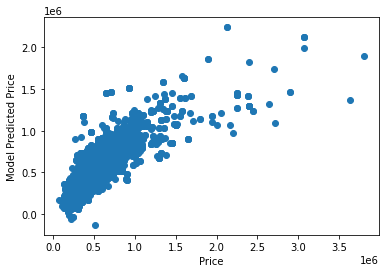

In [42]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Price')
plt.ylabel('Model Predicted Price')

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R^2:",r2_score(y_test,y_test_pred))
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.697224196346618
MAE: 112493.72529576615
MSE: 33013940726.36676
RMSE: 181697.38778080096


In [44]:
print("RandomForest",RFR.score(X_test,y_test))

RandomForest 0.98460175166474


In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)


DecisionTreeRegressor()

In [47]:
y_train_pred= lm.predict(X_train)
y_train_pred

array([402337.17967144, 139548.06142335, 597384.36056792, ...,
       470297.30789516, 539161.20752347, 553696.93050064])

Text(0, 0.5, 'model predicted purchase')

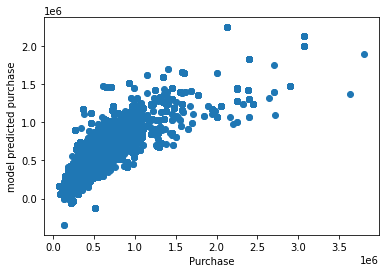

In [48]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Purchase')
plt.ylabel('model predicted purchase')

In [49]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([863080.11138503, 438150.51750585, 146233.2934192 , ...,
       759515.728116  , 153833.13146548, 446720.38254958])

Text(0, 0.5, 'Model Predicted Price')

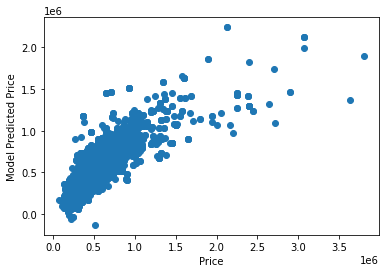

In [50]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Price')
plt.ylabel('Model Predicted Price')

In [51]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R^2:",r2_score(y_test,y_test_pred))
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.697224196346618
MAE: 112493.72529576615
MSE: 33013940726.36676
RMSE: 181697.38778080096


In [52]:
print("Decision Tree",DTR.score(X_test,y_test))

Decision Tree 0.9821562027306907


In [54]:
compare_models = pd.DataFrame(
    {  'Model' : ['LinearRegression', 'Random Forest','Decision Tree',],
       'Score' : [lm.score(X_test,y_test),RFR.score(X_test,y_test), DTR.score(X_test,y_test)],
    })
  
print(compare_models)

              Model     Score
0  LinearRegression  0.697224
1     Random Forest  0.984602
2     Decision Tree  0.982156
